# Classifying Handwritten Digits

The aim of this project is to explore image classification and to practice classifying handwritten digits using traditional machine learning models and deep neural networks. As this project is chiefly for my own edification, I'll not necessarily be focusing on maximizing accuracy, but instead on the generalities of image classification and the differences between traditional machine learning models and different deep neural networks.

The data I'm using is part of the [UCI Machine Learning Hand-Written Digits Dataset]('http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits') which I'll be loading using the [sklearn.datasets.load_digits() function]('https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html'). 

# Importing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
%matplotlib inline

digits = load_digits()

digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [2]:
labels = pd.Series(digits['target'])
labels.tail()

1792    9
1793    0
1794    8
1795    9
1796    8
dtype: int64

In [3]:
data = pd.DataFrame(digits['data'])
print(data.shape)
data.head()

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


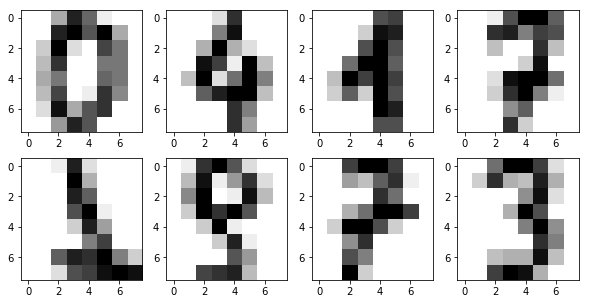

In [4]:
image_rows = [[0, 100, 200, 300], [1000, 1100, 1200, 1300]]
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(10,5))

for i in range(len(image_rows)):
    for j in range(len(image_rows[i])):
        image = data.iloc[image_rows[i][j]]
        np_image = image.values.reshape(8,8)
        axes[i, j].imshow(np_image, cmap='gray_r')
        

The data consists of 1797 images (8 x 8 pixels) of handwritten digits, each of which is represented as a row of 64 pixel values. As you can see from the images above, the low resolution may make classification difficult; a human would even struggle at this resolution. One of the reasons the images are of such low resolution is to reduce computation time. There are, after all, 126,656 data points in the dataset and a sizable number of features. A relatively small increase in resolution, say to 12 x 12 pixels, would result in 144 features and a total of 258,768 data points. This is clearly one of the difficulties involved in image classification. Increasing resolution would likely increase accuracy, but the computational cost also skyrockets.

# Classifying with K-Nearest Neighbors

In [5]:
# 50% of data will be our train set and 50% will be our test set.
threshold = int(data.shape[0]/2)

train_features = data.iloc[:threshold]
test_features = data.iloc[threshold:]
train_labels = labels.iloc[:threshold]
test_labels = labels.iloc[threshold:]

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score

def train_knn(features, labels, k=5):
    '''
    Trains a k-nearest neighbors classifier
    Returns trained model
    
    features: train features
    labels: train target
    k: number of neighbors
    '''
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features, labels)
    
    return knn

def test(model, features, labels):
    '''
    Tests model
    Returns accuracy score
    
    model: fitted model
    features: test features
    labels: test labels
    '''
    
    predictions = model.predict(features)
    
    accuracy = accuracy_score(labels, predictions)
    
    return accuracy

def cross_validate(k=5, n=4):
    '''
    Trains, tests and cross-validates model. 
    Returns accuracy score
    
    k: number of neighbors for model
    n: number of number of folds
    '''
    
    accuracies = list()
    
    kf = KFold(n, random_state=1)
    
    for train_idx, test_idx in kf.split(data):
        train_features, train_labels = data.iloc[train_idx], labels.iloc[train_idx]
        test_features, test_labels = data.iloc[test_idx], labels.iloc[test_idx]
        knn = train_knn(train_features, train_labels, k)
        accuracies.append(test(knn, test_features, test_labels))
    
    # I'm leaving this commented out line of code to show how easily the above is accomplished
    # with the sklearn.model_selection.cross_val_score() function. Note also that the helper functions
    # aren't necessary with cross_val_score(). The biggest downside is that it's somewhat cryptic
    # unless you're familiar with the cross_val_score() function. Note I would need to instantiate 
    # an evaluator before running the cross_val_score() function.
    
    #accuracy = cross_val_score(knn, data, labels, scoring='accuracy', cv=kf)
    
    return np.mean(accuracies)
    
cross_validate()
    

0.9621665429349171

[0.9616010888393962, 0.9621665429349171, 0.9571578817124474, 0.9527047760455333, 0.9532628062360802, 0.9499232863152685, 0.9482566196486019]


Text(0, 0.5, 'Accuracy')

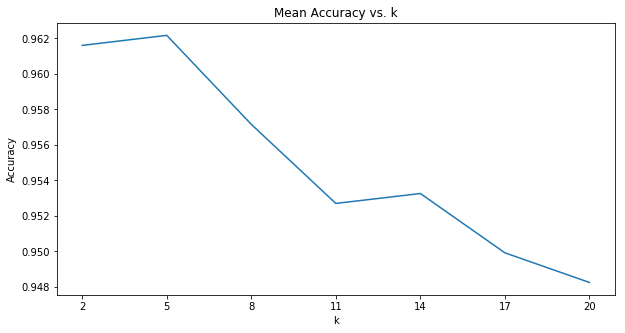

In [7]:
k_vals = np.arange(2, 23, 3)
k_accuracies = list()

for k in k_vals:
    k_accuracies.append(cross_validate(k))

print(k_accuracies)    
plt.figure(figsize=(10,5))
plt.plot(k_vals, k_accuracies)
plt.xticks(k_vals)
plt.title('Mean Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')

The above graph demonstrates that increasing the number of neighbors for the k-nearest neighbors classifier reduces accuracy, which makes sense; if we tell a child that a five and a seven are close enough to a six, that child may inaccurately classify fives and sevens as sixes. This is of course an oversimplification of what increasing the number of neighbors does to the classifier, but it nonetheless illustrates the point. Keeping with this illustration, having too low a number of neighbors would also present problems; telling the child that only a five can contain a five could potentially make it difficult for the child to recognize a five in the number fifty or twenty-five, for example.

In [8]:
import time

# Let's see how long it takes our k-nearest neighbors model to run
# We'll vary our k-value and run it with holdout validation and then with 4-fold cross validation

for k in k_vals:
    start = time.time()
    model = train_knn(train_features, train_labels, k)
    test(model, test_features, test_labels)
    end = time.time()
    print('Holdout validation:\nNeighbors: {0}\nTime: {1}\n'.format(k, end - start))
    start = time.time()
    cross_validate(k)
    end = time.time()
    print('4-fold cross validation:\nNeighbors: {0}\nTime: {1}\n'.format(k, end - start))


Holdout validation:
Neighbors: 2
Time: 0.09575915336608887

4-fold cross validation:
Neighbors: 2
Time: 0.29045820236206055

Holdout validation:
Neighbors: 5
Time: 0.08875083923339844

4-fold cross validation:
Neighbors: 5
Time: 0.30978965759277344

Holdout validation:
Neighbors: 8
Time: 0.11112427711486816

4-fold cross validation:
Neighbors: 8
Time: 0.3896043300628662

Holdout validation:
Neighbors: 11
Time: 0.10695028305053711

4-fold cross validation:
Neighbors: 11
Time: 0.3708508014678955

Holdout validation:
Neighbors: 14
Time: 0.1062307357788086

4-fold cross validation:
Neighbors: 14
Time: 0.37112903594970703

Holdout validation:
Neighbors: 17
Time: 0.11366128921508789

4-fold cross validation:
Neighbors: 17
Time: 0.37650179862976074

Holdout validation:
Neighbors: 20
Time: 0.10773444175720215

4-fold cross validation:
Neighbors: 20
Time: 0.40145182609558105



Holdout validation is obviously much faster since there aren't any loops inside our functions. Just to be thorough, let's see how fast the cross_val_score() function runs.

In [9]:
for k in k_vals:
    start = time.time()
    knn = KNeighborsClassifier()
    kf = KFold(4, random_state=1)
    cross_val_score(knn, data, labels, scoring='accuracy', cv=kf)
    end = time.time()
    print('4-fold cross validation (cross_val_score()):\nNeighbors: {0}\nTime: {1}\n'.format(k, end - start))

4-fold cross validation (cross_val_score()):
Neighbors: 2
Time: 0.3050198554992676

4-fold cross validation (cross_val_score()):
Neighbors: 5
Time: 0.30359864234924316

4-fold cross validation (cross_val_score()):
Neighbors: 8
Time: 0.2966313362121582

4-fold cross validation (cross_val_score()):
Neighbors: 11
Time: 0.31049513816833496

4-fold cross validation (cross_val_score()):
Neighbors: 14
Time: 0.3010690212249756

4-fold cross validation (cross_val_score()):
Neighbors: 17
Time: 0.2976062297821045

4-fold cross validation (cross_val_score()):
Neighbors: 20
Time: 0.29741811752319336



As expected, the sklearn.model_selection.cross_val_score() function is generally faster than our k-fold cross validation function. This doesn't necessarily mean that it's always better to use the sklearn function. If readability is more important than performance, for example, we may want to define our own function as I've done above so that the validation steps are obvious. If performance is more important, the sklearn function may be more desirable, though admittedly the performance improvement is only noticeable when using a large number of neighbors.

# Classifying with Neural Networks
## Single-layer Perceptron

In [10]:
from sklearn.neural_network import MLPClassifier

# Modify above train function to accomodate either model
def train_model(model_name, features, labels, k=5, h=(4,) , f='relu'):
    '''
    Trains a k-nearest neighbors or multi-layer perceptron classifier
    Returns trained model
    
    model: string representing desired model ('knn' or 'mpl')
    features: train features
    labels: train target
    k: number of neighbors (default is 5)
    h: tuple for hidden layers. default example: (4,) means 4 neurons and 1 layer 
       and (4, 4,) means two layers with four neurons each.
    f: activation function (default is relu)
    '''
    
    if model_name == 'knn':
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(features, labels)
    
        return knn
    
    elif model_name == 'mlp':
        mlp = MLPClassifier(h, f, random_state=1)
        mlp.fit(features, labels)
        
        return mlp
    
    else:
        
        return "Model not specified: expected 'knn' or 'mlp'"
    
# Modify cross_validate function to accommodate both models    
def cross_validate(model_name, k=5, folds=4, h=(4,), f='relu'):
    '''
    Trains, tests and cross-validates model. 
    Returns accuracy score
    
    model_name: string representing model to use ('knn' or 'mlp')
    k: number of neighbors for knn model
    folds: number of number of folds
    h: tuple for hidden layers. default example: (4,) means 4 neurons and 1 layer 
       and (4, 4) means two layers with four neurons each.
    f: activation function (default relu)
    '''
    
    accuracies = list()
    
    kf = KFold(folds, random_state=1)
    
    for train_idx, test_idx in kf.split(data):
        train_features, train_labels = data.iloc[train_idx], labels.iloc[train_idx]
        test_features, test_labels = data.iloc[test_idx], labels.iloc[test_idx]
        model = train_model(model_name, train_features, train_labels, k, h, f)
        accuracies.append(test(model, test_features, test_labels))
    
    return np.mean(accuracies)


In [11]:
n_neurons = [8, 16, 32, 64, 128, 256]

n_accuracies = []
for n in n_neurons:
    # Let's time this just for fun
    start = time.time()
    n_accuracies.append(cross_validate('mlp', h=(n,)))
    end = time.time()
    print('Single-layer Perceptron:\nNeurons: {0}\nTime: {1}'.format(n, end - start))
    

/home/zrupp/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/zrupp/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/zrupp/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/zrupp/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

Single-layer Perceptron:
Neurons: 8
Time: 2.866133451461792


/home/zrupp/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/zrupp/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/zrupp/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/zrupp/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

Single-layer Perceptron:
Neurons: 16
Time: 3.1624584197998047


/home/zrupp/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/zrupp/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/zrupp/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/zrupp/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

Single-layer Perceptron:
Neurons: 32
Time: 3.6105034351348877
Single-layer Perceptron:
Neurons: 64
Time: 3.571265697479248
Single-layer Perceptron:
Neurons: 128
Time: 3.937432289123535
Single-layer Perceptron:
Neurons: 256
Time: 4.6487038135528564


[0.7790856223707003, 0.9198750309329374, 0.9237701064093046, 0.9343268992823559, 0.9443516456322693, 0.9521405592675081]


Text(0, 0.5, 'Accuracy')

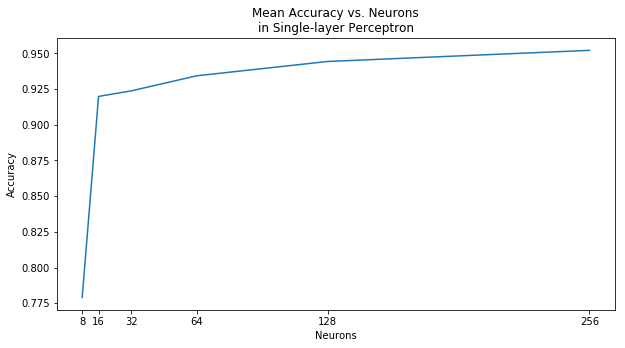

In [12]:
print(n_accuracies)
plt.figure(figsize=(10,5))
plt.plot(n_neurons, n_accuracies)
plt.xticks(n_neurons)
plt.title('Mean Accuracy vs. Neurons\nin Single-layer Perceptron')
plt.xlabel('Neurons')
plt.ylabel('Accuracy')

Those models all took a long time to run, which is to be expected, considering the computation involved. The accuracy improves substantially with the number of neurons, but I don't see any benefit to using a single-layer perceptron over k-nearest neighbors. The best performance occurred when using 64 neurons, though there is a chance this is overfitting. After that, performance remains fairly stagnant.

## Multi-layer Perceptron

In [13]:
neuron_arches = [
    (64,),
    (64, 64)
]

n_accuracies = []

for arch in neuron_arches:
    n_accuracies.append(cross_validate('mlp', h=arch))
    


[0.9343268992823559, 0.9421195248700817]


Text(0, 0.5, 'Accuracy')

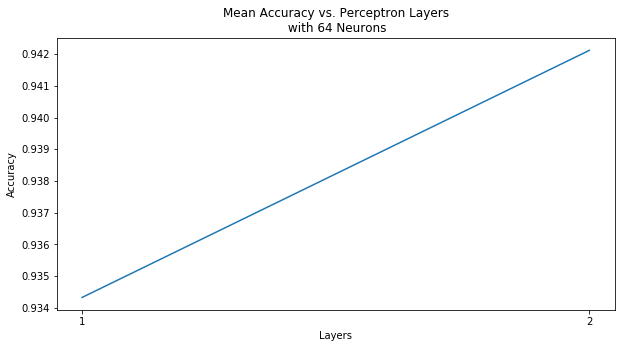

In [14]:
print(n_accuracies)
plt.figure(figsize=(10,5))
plt.plot([1, 2], n_accuracies)
plt.xticks([1, 2])
plt.title('Mean Accuracy vs. Perceptron Layers\n with 64 Neurons')
plt.xlabel('Layers')
plt.ylabel('Accuracy')

Increasing layers increased our predictions by approximately 1%. Let's see how two layers perform with more neurons.

In [15]:
neuron_arches = [
    (64, 64),
    (128, 128),
    (256, 256)
]

n_accuracies = []

for arch in neuron_arches:
    n_accuracies.append(cross_validate('mlp', h=arch))

[0.9421195248700817, 0.9515775798069784, 0.9560356347438752]


Text(0, 0.5, 'Accuracy')

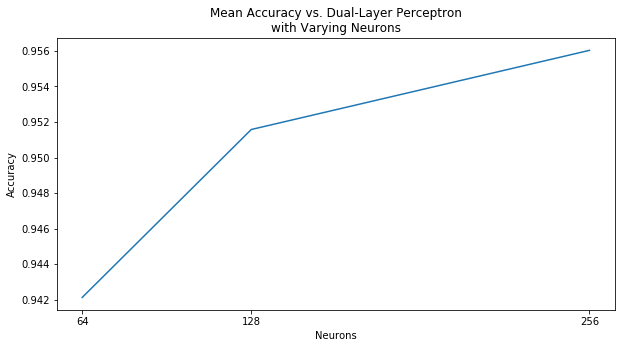

In [16]:
print(n_accuracies)
plt.figure(figsize=(10,5))
plt.plot([64, 128, 256], n_accuracies)
plt.xticks([64, 128, 256])
plt.title('Mean Accuracy vs. Dual-Layer Perceptron\nwith Varying Neurons')
plt.xlabel('Neurons')
plt.ylabel('Accuracy')

Though the performance of the two-layer perceptron with 64 neurons is slightly lower than its single-layer counterpart, we do see a noticeable increase to 95% accuracy when we increase the neuron count to 128. It's important to note that increasing the number of hidden layers generally also increases overfitting. Increasing the number of folds in our cross validation helps counteract this overfitting, so I'm not concerned that this model won't generalize well to external data.

## Combatting Multi-Layer Perceptron Overfitting by Increasing k-folds

In [17]:
neuron_arches = [
    (64, 64, 64),
    (128, 128, 128),
    (256, 256, 256)
]

n_accuracies = []

for arch in neuron_arches:
    n_accuracies.append(cross_validate('mlp', h=arch, folds=6))


Text(0, 0.5, 'Accuracy')

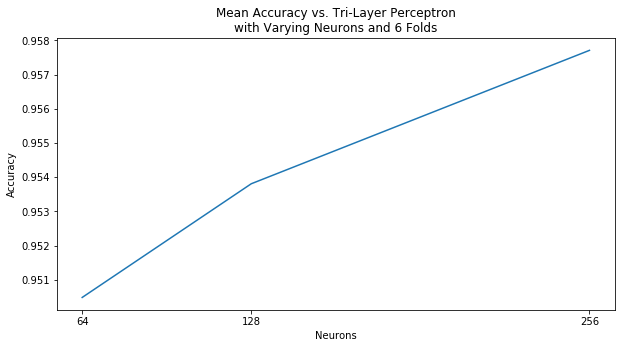

In [18]:
plt.figure(figsize=(10,5))
plt.plot([64, 128, 256], n_accuracies)
plt.xticks([64, 128, 256])
plt.title('Mean Accuracy vs. Tri-Layer Perceptron\nwith Varying Neurons and 6 Folds')
plt.xlabel('Neurons')
plt.ylabel('Accuracy')

In [19]:
print(n_accuracies)

[0.9504812337421034, 0.9538071348940914, 0.9577090301003346]


Increasing the number of hidden layers increases the accuracy of our predictions, as expected, and increasing the number of folds seems to do a good job of preventing overfitting.

# Next Steps

1. Try other models:
    a. Decision Tree
    b. Random Forest
2. Write up summary of different model effectiveness with data to support conclusions
3. Experiment with different activation functions to see impact on prediction accuracy
4. Research techniques for visualizing weights in neural network models and add visualization pipeline
5. Remove timing examples and save that for another project?